## Observations and Insights 

Pymaceuticals Analysis The information of 249 mice was analysed.
1.- Concerning the sex of the mice, the distribution was almost even, due to the population being composed by 50.74% of male
    mice and 49.26% of females.
2.- As per summary table and boxplot, Ramicane seems to be the most effective in reducing tumor growth, having the lowest mean,     median, variance and standard deviation. It is followed closely by Capmulin. 
3.- The correlation and regression tells us there is a strong positive relationship between tumor volume and mouse weight
    ( the heavier the mouse, the bigger tumor volume). The correlation between both factors is 0.84

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_combine_data= pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
mice_combine_data.head()                                                                     


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [39]:
# Checking the number of mice.
mice_combine_data["Mouse ID"].count()


1893

In [40]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = mice_combine_data[mice_combine_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [41]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mice_combine_data.loc[mice_combine_data['Mouse ID'] == "g989",:]
duplicate_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mice_combine_data.drop_duplicates(subset = ["Mouse ID","Timepoint"])
clean_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [43]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_study['Mouse ID'].unique())

249

## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_group = clean_mouse_study.groupby(["Drug Regimen"])

# Mean of tumor volume
Mean_tv = round(drug_group["Tumor Volume (mm3)"].mean(),2)

# Median of tumor volume
Median_tv = round(drug_group["Tumor Volume (mm3)"].median(),2)

# Variance of tumor volume
Variance_tv = round(drug_group["Tumor Volume (mm3)"].var(),2)

# Standard deviation of tumor volume
Stdev_tv = round(drug_group["Tumor Volume (mm3)"].std(),2)

# SEM of tumor volume
SEM_tv = round(drug_group["Tumor Volume (mm3)"].sem(),2)

#Create dataframe with summary statistics information
Summary_Dg_stats = pd.DataFrame({ "Tumor Volume Mean": Mean_tv, 
                                  "Tumor Volume Median": Median_tv, 
                                  "Tumor Volume Variance": Variance_tv, 
                                  "Tumor Volume Standard Deviation": Stdev_tv,
                                  "Tumor Volume SEM":SEM_tv    
})

Summary_Dg_stats


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
sum_stat_dg = round(drug_group['Tumor Volume (mm3)'].agg(["mean", "median", "var", "std", "sem"]), 2)

sum_stat_dg = sum_stat_dg.rename(columns={"mean": "Tumor Volume Mean", "median": "Tumor Volume Median", 
                                "var": "Tumor Volume Variance", "std": "Tumor Volume Standard Deviation", 
                                 "sem": "Tumor Volume SEM"})
sum_stat_dg


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

Text(0.5, 1.0, 'Measurments per Drug Regimen')

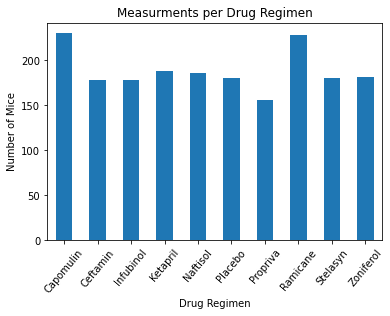

In [46]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
dr_bar_chart=drug_group["Mouse ID"].count()
dr_bar_plot=dr_bar_chart.plot.bar(rot = 50)
dr_bar_plot.set_xlabel("Drug Regimen")
dr_bar_plot.set_ylabel("Number of Mice")
dr_bar_plot.set_title("Measurments per Drug Regimen")

Text(0, 0.5, 'Total Mice')

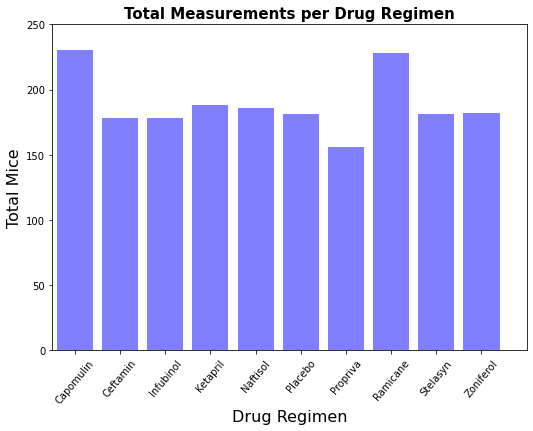

In [47]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(dr_bar_chart))
y_axis = dr_bar_chart

#Make ticks 
tx = list(dr_bar_chart.index.values)
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8.5,6))
plt.bar(x_axis, y_axis, alpha=0.5, align="center", color='blue')
plt.xticks(tick_locations, tx, rotation="50")

# Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, 250)

# Set a Title and labels
plt.title("Total Measurements per Drug Regimen",fontsize=15, fontweight='bold')
plt.xlabel("Drug Regimen", fontsize=16)
plt.ylabel("Total Mice",fontsize=16)



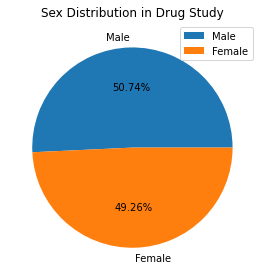

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex=clean_mouse_study["Sex"].value_counts()
mice_piepd = mouse_sex.plot(kind="pie",y='Mouse ID', title=("Sex Distribution in Drug Study"), autopct = '%.2f%%')
mice_piepd.legend(loc='upper right')
mice_piepd.set_ylabel("")
plt.tight_layout()


(-1.1053783266922994,
 1.1002561107948714,
 -1.1062424936743749,
 1.1032653842934317)

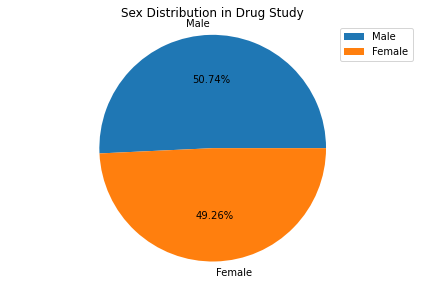

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex = clean_mouse_study["Sex"].value_counts()
explode = (0,0)
labels = list(mice_sex.index)
plt.title('Sex Distribution in Drug Study')
plt.pie(mice_sex, explode=explode, labels=labels, autopct='%.2f%%')
plt.legend(labels, loc='upper right')
plt.tight_layout()
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the greatest timepoint for each mouse
max_timepoint=clean_mouse_study.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tx_df = pd.merge(max_timepoint , clean_mouse_study, on=(["Mouse ID","Timepoint"]))
tx_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [51]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tx_regimen = tx_df.loc[tx_df["Drug Regimen"] == treatment]
    tumor_vol= tx_regimen['Tumor Volume (mm3)']  
    # add subset 
    tumor_vol_data.append(tumor_vol)
       
# Determine outliers using upper and lower bounds
#1 Capomulin
quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)
print(f"For {treatments[0]} values below {lower_bound0} and above {upper_bound0} could be outliers")

#2 Ramicane
quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)
print(f"For {treatments[1]} values below {lower_bound1} and above {upper_bound1} could be outliers")

#3 Infubinol
quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2
lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)
print(f"For {treatments[2]} values below {lower_bound2} and above {upper_bound2} could be outliers")

#4 Ceftamin
quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3
lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)
print(f"For {treatments[3]} values below {lower_bound3} and above {upper_bound3} could be outliers")

For Capomulin values below 20.70456164999999 and above 51.83201549 could be outliers
For Ramicane values below 17.912664470000003 and above 54.30681135 could be outliers
For Infubinol values below 36.83290494999999 and above 82.74144559000001 could be outliers
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 could be outliers


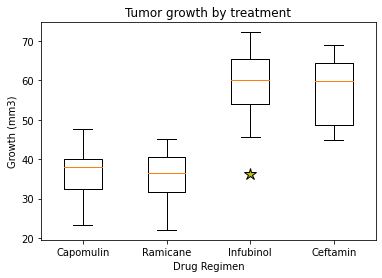

In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='*', markerfacecolor='y', markersize=12,
                  linestyle='none')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor growth by treatment')
ax1.set_ylabel('Growth (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol_data, flierprops = flierprops, labels = treatments)
plt.show()

## Line and Scatter Plots

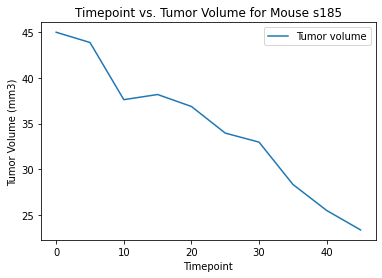

In [53]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
drug_regimen = clean_mouse_study.loc[clean_mouse_study['Drug Regimen'] == 'Capomulin']
mouse = drug_regimen.loc[drug_regimen['Mouse ID'] == 's185']

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], label="Tumor volume") 
plt.legend(loc="best")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Timepoint vs. Tumor Volume for Mouse s185')
plt.show()


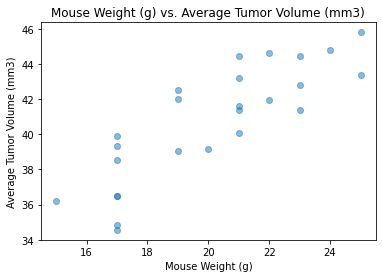

In [54]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#calculate average tumour volume and average weight for scatter plot
cap_group = drug_regimen.groupby(['Mouse ID']).mean()
avg_tumor_vol = cap_group["Weight (g)"]
avg_weight = cap_group["Tumor Volume (mm3)"]

plt.scatter(avg_tumor_vol,avg_weight, alpha=0.5)

plt.title('Mouse Weight (g) vs. Average Tumor Volume (mm3)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708723
y = 0.95x + 21.55


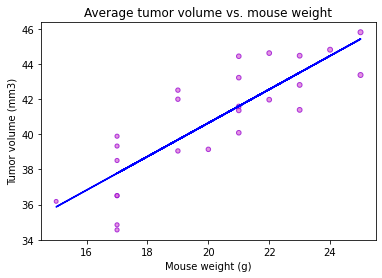

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Equations for correlation and regression
correlation = st.pearsonr(avg_tumor_vol,avg_weight)
slope, intercept, rvalue, pvalue, stderr = linregress(avg_tumor_vol, avg_weight)
regress_values = avg_tumor_vol * slope + intercept

#Do scatterplot 
#Change colors 
plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="orchid", edgecolors="darkviolet",
             s=avg_tumor_vol, alpha=0.75)
plt.plot(avg_tumor_vol,regress_values,"b-")


#Add title and labels
plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
